<a href="https://colab.research.google.com/github/annefrancine/Time-series/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Passengers
Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [0]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import Series

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
d = read_csv( "/content/drive/My Drive/curso series temporais (udemy)/Dados/AirPassengers.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
d

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [5]:
differenced = d.diff(12)
differenced.head(n=13)

Month
1949-01-01    NaN
1949-02-01    NaN
1949-03-01    NaN
1949-04-01    NaN
1949-05-01    NaN
1949-06-01    NaN
1949-07-01    NaN
1949-08-01    NaN
1949-09-01    NaN
1949-10-01    NaN
1949-11-01    NaN
1949-12-01    NaN
1950-01-01    3.0
Name: #Passengers, dtype: float64

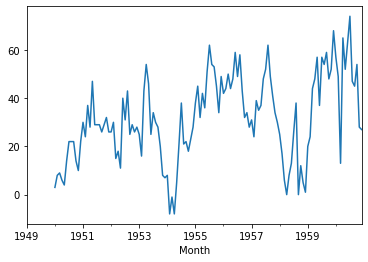

In [6]:
differenced.plot()
pyplot.show()

In [0]:
differenced = differenced[12:]

In [8]:
differenced.head(n=13)

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
Name: #Passengers, dtype: float64

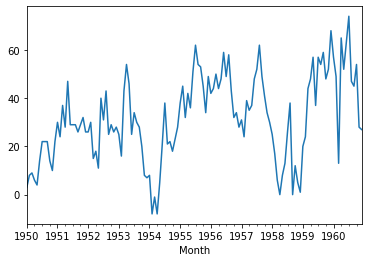

In [9]:
differenced.plot()
pyplot.show()

In [10]:
dataframe = pd.DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = differenced.shift(i)
    dataframe['t'] = differenced.values
print(dataframe.head(13))
dataframe = dataframe[13:]

            t-12     t  t-11  t-10  t-9  ...   t-5   t-4   t-3   t-2   t-1
Month                                    ...                              
1950-01-01   NaN   3.0   NaN   NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
1950-02-01   NaN   8.0   NaN   NaN  NaN  ...   NaN   NaN   NaN   NaN   3.0
1950-03-01   NaN   9.0   NaN   NaN  NaN  ...   NaN   NaN   NaN   3.0   8.0
1950-04-01   NaN   6.0   NaN   NaN  NaN  ...   NaN   NaN   3.0   8.0   9.0
1950-05-01   NaN   4.0   NaN   NaN  NaN  ...   NaN   3.0   8.0   9.0   6.0
1950-06-01   NaN  14.0   NaN   NaN  NaN  ...   3.0   8.0   9.0   6.0   4.0
1950-07-01   NaN  22.0   NaN   NaN  NaN  ...   8.0   9.0   6.0   4.0  14.0
1950-08-01   NaN  22.0   NaN   NaN  NaN  ...   9.0   6.0   4.0  14.0  22.0
1950-09-01   NaN  22.0   NaN   NaN  NaN  ...   6.0   4.0  14.0  22.0  22.0
1950-10-01   NaN  14.0   NaN   NaN  3.0  ...   4.0  14.0  22.0  22.0  22.0
1950-11-01   NaN  10.0   NaN   3.0  8.0  ...  14.0  22.0  22.0  22.0  14.0
1950-12-01   NaN  22.0   

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [14]:
#mostra a importancia, a segunda é a mais importante
print(model.feature_importances_)

[0.0249511  0.37561103 0.01541998 0.0167022  0.01435688 0.02521651
 0.02093459 0.02271564 0.02462942 0.05339896 0.12840096 0.27766272]


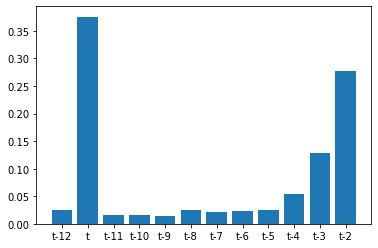

In [15]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [0]:
from sklearn.feature_selection import RFE

In [0]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

In [18]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t
t-4
t-3
t-2
